# K means Clustering 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/Users/joelmendonsa/Desktop/ML Projects/newenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


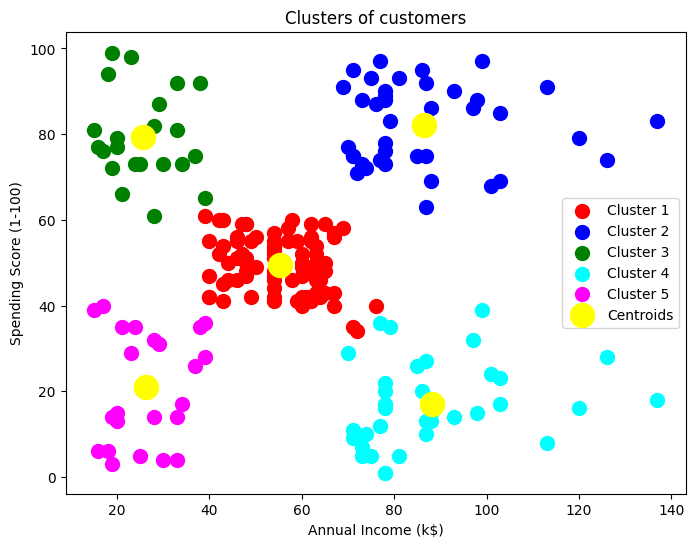

In [3]:
from sklearn.cluster import KMeans

X = df.iloc[:, [3, 4]].values

# KMeans clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
df['Cluster'] = y_kmeans

# Colors for different clusters
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

# Plotting clusters
plt.figure(figsize=(8, 6))
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data.iloc[:, 3], cluster_data.iloc[:, 4], s=100, c=colors[i], label=f'Cluster {i+1}')

# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


/Users/joelmendonsa/Desktop/ML Projects/newenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


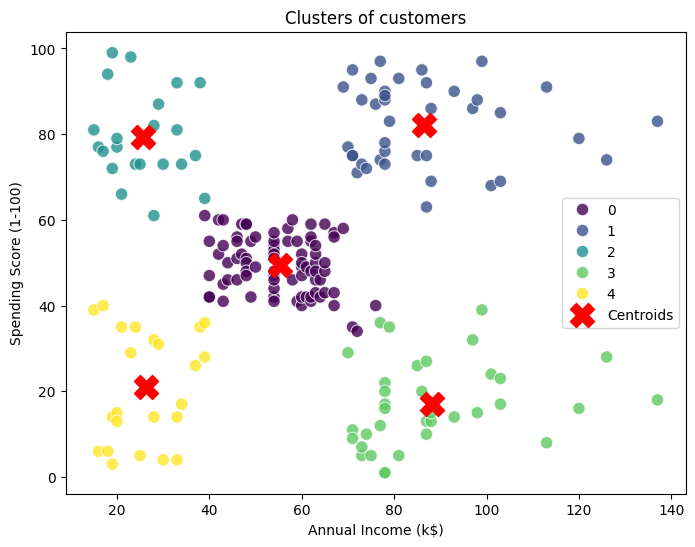

In [5]:
import seaborn as sns
# Select columns for clustering
X = df.iloc[:, [3, 4]].values

# KMeans clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
df['Cluster'] = y_kmeans

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=80, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('Clusters of customers')
plt.legend()
plt.show()

# Hierarchical Clustering 

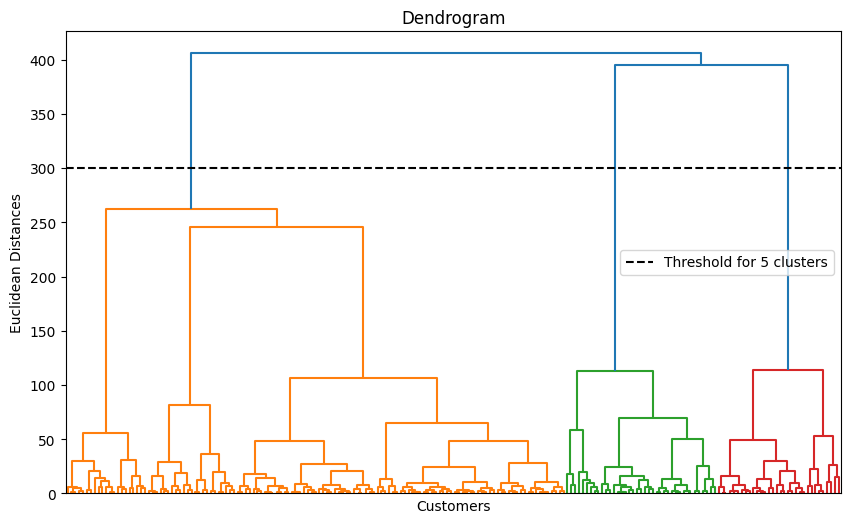

In [11]:
# Select columns for clustering
X = df.iloc[:, [3, 4]].values

# Plotting the dendrogram without x-axis labels
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), leaf_font_size=10, leaf_rotation=90, color_threshold=300, labels=None)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=300, color='black', linestyle='--', label='Threshold for 5 clusters')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Hide x-axis ticks and labels
plt.legend(loc='right')
plt.show()